<a href="https://colab.research.google.com/github/oyinloluwa20/Deep-Learning/blob/main/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn #nn contains all of pytorch's building block from neural network
import matplotlib.pyplot as plt

#check pyTorch version
torch.__version__


'1.12.1+cu113'

##Data(preparing and loading)
* Excel speadsheet
* Images of any kind
* Vidoes like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

let's create some known data using the linear regression formula.

We'll use a linear regression formula to make a straight line with known parameters.

In [3]:
# Create a known parameters
weight =0.7
bias =0.3

#Create
start =0
end=1
step=0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [8]:
 len(X) , len(y)

(50, 50)

### Splitting data into training and testing sets

In [11]:
#Create a train/test split
train_split =int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
 
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [23]:
def plot_predictions(train_data =X_train,
                    train_labels =y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions =None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label ="Training data")

  #Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label ="Test data")

  #Are there predictions?
  if predictions is not None:
    plt.scatter(test_data, predictions, c ="r" , label =" Predictions")

  # Show the lengend
  plt.legend(prop ={"size" :14});


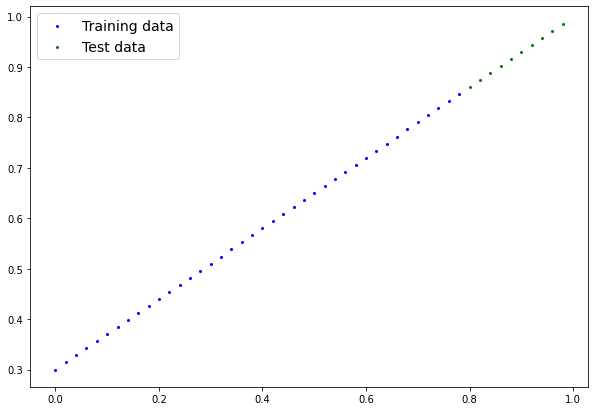

In [24]:
plot_predictions()

##2. Build model
First PyTorch model.


In [ ]:
from torch import nn
#Create linear regression model class
class linearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights =nn.parameter(torch.randn(1,
                                           requires_grad =True,
                                           dtype= torch.float))
    self.bias =nn .Parameter(torch.randn(1,
                                           requires_grad =True,
                                           dtype= torch.float))
    #Forward method to define the computation in the model
    def forward(self, x:torch.Tensor)-> torch.Tensor:
      return self.weights * x +self.bias